In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [12]:
data_points=[]
max_value=5
data_length=10
for i in range(data_length):
    data_points.append([random.random()*max_value,random.random()*max_value])

In [13]:
print(data_points)

[[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [0.9894937829450656, 2.9723599684547057], [1.0398603696089066, 2.9148115624494157], [0.4080731802211507, 1.1747107515085382], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [4.355885371219744, 4.736340292087576], [2.6336584415679702, 1.8965004786848265]]


In [14]:
clusters={0:[]}
# { cluster_id : [data_points] }

for i in range(len(data_points)):
    clusters[0].append(data_points[i])

print(clusters)


{0: [[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [0.9894937829450656, 2.9723599684547057], [1.0398603696089066, 2.9148115624494157], [0.4080731802211507, 1.1747107515085382], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [4.355885371219744, 4.736340292087576], [2.6336584415679702, 1.8965004786848265]]}


In [15]:
def euclidean_distance(a,b):
    dist=0
    for i in range(len(a)):
        dist+=(a[i]-b[i])**2
    return dist**0.5

# give the centroids point of multiple clusters
def combine_points(pointarr):
    x=0
    y=0
    for i in range(len(pointarr)):
        x+=pointarr[i][0]
        y+=pointarr[i][1]
    return [x/len(pointarr),y/len(pointarr)]

# find the minimum distance between two clusters
def find_max_dist(clusters):
    max_dist=0
    for idx in clusters:
        pointx=combine_points(clusters[idx])
        for indx in range(len(clusters[idx])):
            pointy=clusters[idx][indx]
            dist=euclidean_distance(pointx,pointy)
            max_dist=max(max_dist,dist)
    return max_dist

# find the clusters that have minimum distance between them and make connections or edges between them
def find_farthest_point_in_cluster(cluster,max_dist):
    pointx=combine_points(cluster)
    points=[]
    for indx in range(len(cluster)):
        pointy=cluster[indx]
        dist=euclidean_distance(pointx,pointy)
        if dist==max_dist:
            points.append(pointy)

    return points

# merge the clusters
def seperate_cluster(clusters,farthest_points):
    id_count=len(clusters)
    new_clusters={}
    for fidx in farthest_points:
        for indx in range(len(farthest_points[fidx])):
            for cid in clusters:
                if farthest_points[fidx][indx] in clusters[cid]:
                    new_clusters.update({id_count:[farthest_points[fidx][indx]]})
                    id_count+=1
                    clusters[cid].remove(farthest_points[fidx][indx])
    # print(clusters)
    for cid in clusters:
        if len(clusters[cid])==0:
            continue
        new_clusters.update({cid:clusters[cid]})
    return new_clusters
    

In [16]:
def update_cluster(clusters):
    new_clusters={}

    # {cluster_id: fartherst_points}
    fartherst_point={} 
    max_dist=find_max_dist(clusters)
    for idx in clusters:
        temp=find_farthest_point_in_cluster(clusters[idx],max_dist)
        if len(temp)==0:continue
        fartherst_point.update({idx:temp})

    new_clusters=seperate_cluster(clusters,fartherst_point)
    return new_clusters



In [17]:
def print_clusters(clusters):
    print("clusters len : ",len(clusters))
    for idx in clusters:
        print(idx,":",clusters[idx])
    print("\n\n")

In [18]:
def plot_clusters(clusters):
    for idx in clusters:
        x=[]
        y=[]
        for idy in range(len(clusters[idx])):
            x.append(clusters[idx][idy][0])
            y.append(clusters[idx][idy][1])
        color=np.random.rand(3,)
        centroid=combine_points(clusters[idx])
        plt.scatter(x,y,c=color)
        plt.scatter(centroid[0],centroid[1],c=color,marker='*')
    plt.show()

In [19]:
def divisive_clustering(clusters):
    while len(clusters)<data_length:
        print_clusters(clusters)
        plot_clusters(clusters)
        clusters=update_cluster(clusters)
    print_clusters(clusters)
    plot_clusters(clusters)


clusters len :  1
0 : [[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [0.9894937829450656, 2.9723599684547057], [1.0398603696089066, 2.9148115624494157], [0.4080731802211507, 1.1747107515085382], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [4.355885371219744, 4.736340292087576], [2.6336584415679702, 1.8965004786848265]]





/var/folders/x7/9ty2h5cs0716vwyxytpxwh_m0000gn/T/ipykernel_1977/1932151982.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x,y,c=color)
/var/folders/x7/9ty2h5cs0716vwyxytpxwh_m0000gn/T/ipykernel_1977/1932151982.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0],centroid[1],c=color,marker='*')


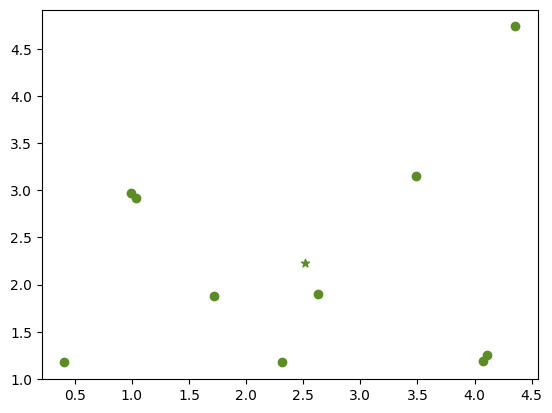

clusters len :  2
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [0.9894937829450656, 2.9723599684547057], [1.0398603696089066, 2.9148115624494157], [0.4080731802211507, 1.1747107515085382], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





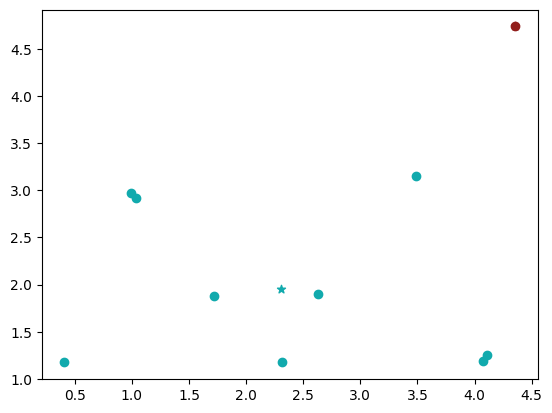

clusters len :  3
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [0.9894937829450656, 2.9723599684547057], [1.0398603696089066, 2.9148115624494157], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





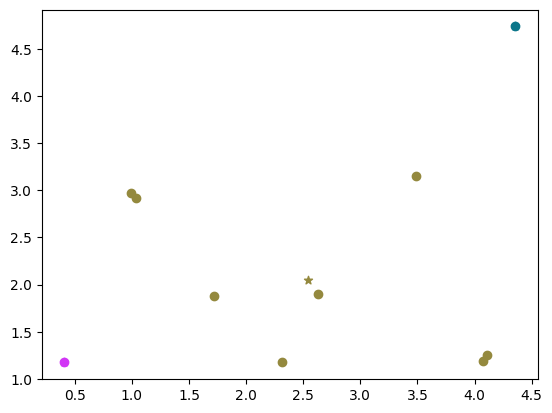

clusters len :  4
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [1.0398603696089066, 2.9148115624494157], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





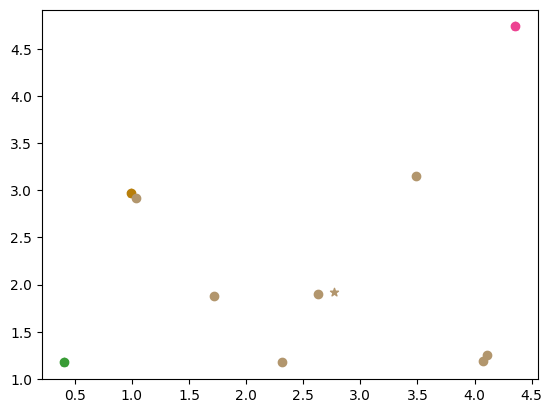

clusters len :  5
4 : [[1.0398603696089066, 2.9148115624494157]]
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[3.4835004606828237, 3.1502044808979783], [1.7229459155124545, 1.8748812526948322], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





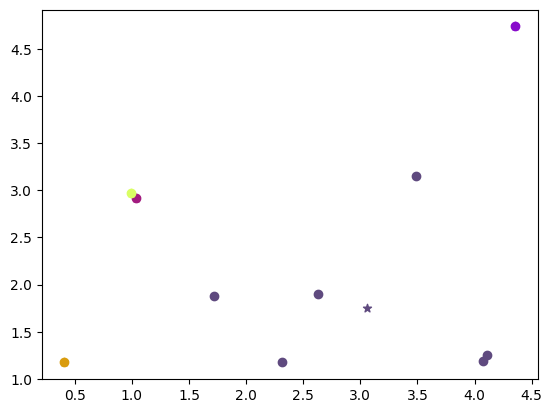

clusters len :  6
5 : [[3.4835004606828237, 3.1502044808979783]]
4 : [[1.0398603696089066, 2.9148115624494157]]
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[1.7229459155124545, 1.8748812526948322], [2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





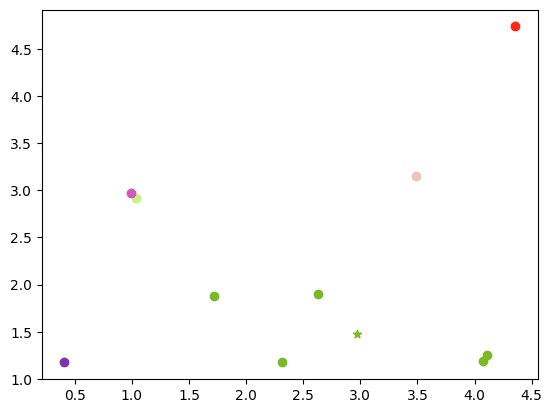

clusters len :  7
6 : [[1.7229459155124545, 1.8748812526948322]]
5 : [[3.4835004606828237, 3.1502044808979783]]
4 : [[1.0398603696089066, 2.9148115624494157]]
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[2.310247406104326, 1.1744809433880747], [4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





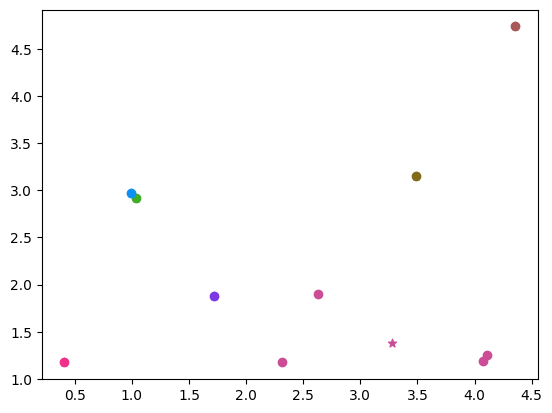

clusters len :  8
7 : [[2.310247406104326, 1.1744809433880747]]
6 : [[1.7229459155124545, 1.8748812526948322]]
5 : [[3.4835004606828237, 3.1502044808979783]]
4 : [[1.0398603696089066, 2.9148115624494157]]
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651], [2.6336584415679702, 1.8965004786848265]]





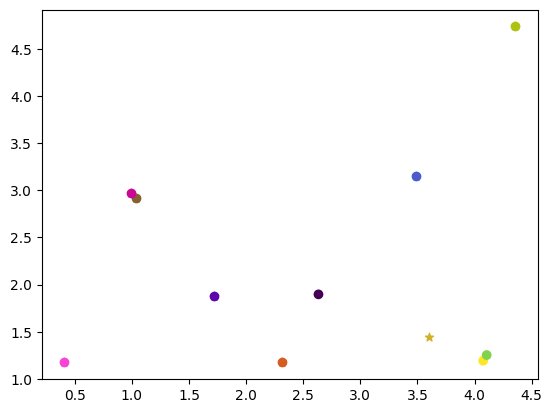

clusters len :  9
8 : [[2.6336584415679702, 1.8965004786848265]]
7 : [[2.310247406104326, 1.1744809433880747]]
6 : [[1.7229459155124545, 1.8748812526948322]]
5 : [[3.4835004606828237, 3.1502044808979783]]
4 : [[1.0398603696089066, 2.9148115624494157]]
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]
0 : [[4.075755416274901, 1.19326517358401], [4.106470869160158, 1.253249868027651]]





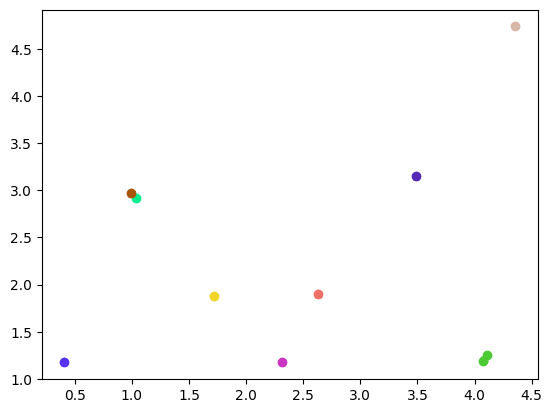

clusters len :  10
9 : [[4.075755416274901, 1.19326517358401]]
10 : [[4.106470869160158, 1.253249868027651]]
8 : [[2.6336584415679702, 1.8965004786848265]]
7 : [[2.310247406104326, 1.1744809433880747]]
6 : [[1.7229459155124545, 1.8748812526948322]]
5 : [[3.4835004606828237, 3.1502044808979783]]
4 : [[1.0398603696089066, 2.9148115624494157]]
3 : [[0.9894937829450656, 2.9723599684547057]]
2 : [[0.4080731802211507, 1.1747107515085382]]
1 : [[4.355885371219744, 4.736340292087576]]





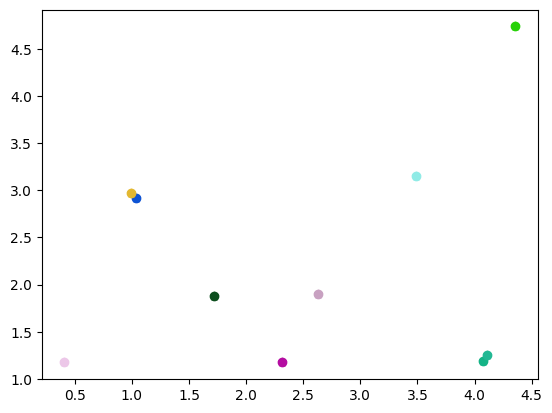

In [20]:
divisive_clustering(clusters)